# Analysis of multisample

This notebook performs multisample analysis on data that is created with the spongepy multisample runs.

***Please adjust the path of the folder below to the path of the multirun you want to analyze***

In [1]:
path_folder = "/srv/scratch/benjaminr/napari-spongepy/logs/segment/multiruns/2022-09-02_00-24-02"

In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import squidpy as sq
from skimage import io
import scanpy as sc
import matplotlib.pyplot as plt
from anndata import AnnData
import yaml
from yaml.loader import SafeLoader
from typing import List
import time
import os
from dotenv import load_dotenv

In [3]:
from napari_spongepy import functions as fc

## Read in the data

In [4]:
def read_in(path_folder: str) -> AnnData:
    # Find all sample folders
    folders = [ name for name in os.listdir(path_folder) if os.path.isdir(os.path.join(path_folder, name)) ]
    print(folders)

    adata_folder = None

    for folder in folders:
        run_folder = path_folder + "/" + folder + "/"

        # If adata file exists, concat to adata folder
        if os.path.exists(run_folder + "adata.h5ad"):
            adata = sc.read(run_folder + "adata.h5ad")

            # Fetch tissue from config if exists
            if os.path.exists(run_folder + ".hydra/config.yaml"):
                with open(run_folder + ".hydra/config.yaml") as infile:
                    data = yaml.load(infile, Loader=SafeLoader)
                    sample = data["dataset"]["image"].split("_")[2]
                    adata.obs["sample"] = sample
                    adata.obs["group"] = sample.split("-")[0]
            else:
                adata.obs["sample"] = folder
                print("config file does not exist: \n" + run_folder)

            # Concatenate adata if adata_folder exists
            if adata_folder:
                adata_folder = adata_folder.concatenate(adata)
            else:
                adata_folder = adata

        else:
            print("Adata file does not exist:\n" + run_folder + "adata.h5ad")
    return adata_folder, folders

In [5]:
import warnings
# Supress anndata dtype warnings
warnings.filterwarnings('ignore', '.*anndata.*')

adata, folders = read_in(path_folder)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
Adata file does not exist:
/srv/scratch/benjaminr/napari-spongepy/logs/segment/multiruns/2022-09-02_00-24-02/2/adata.h5ad


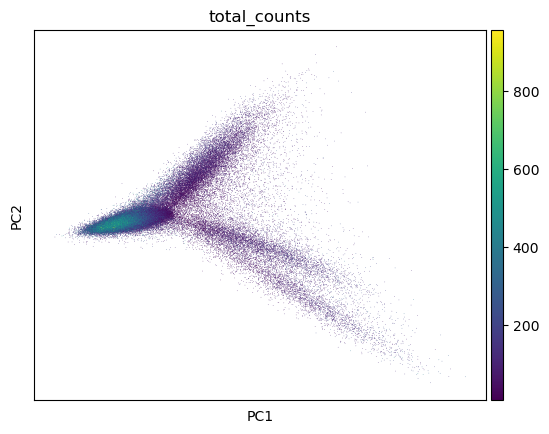

In [6]:
sc.tl.pca(adata, svd_solver='arpack',n_comps=50)
sc.pl.pca(adata, color='total_counts')  

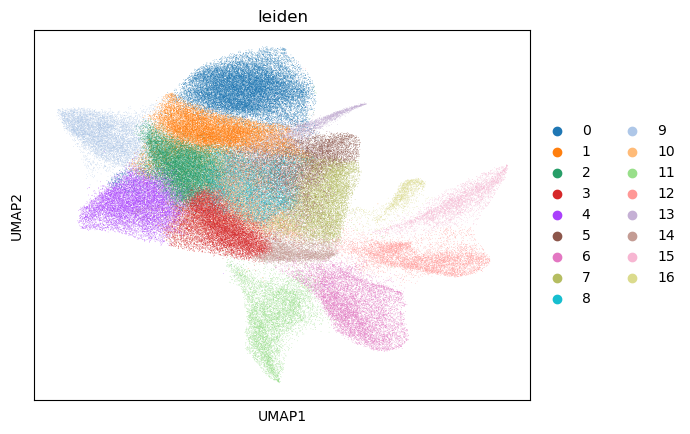

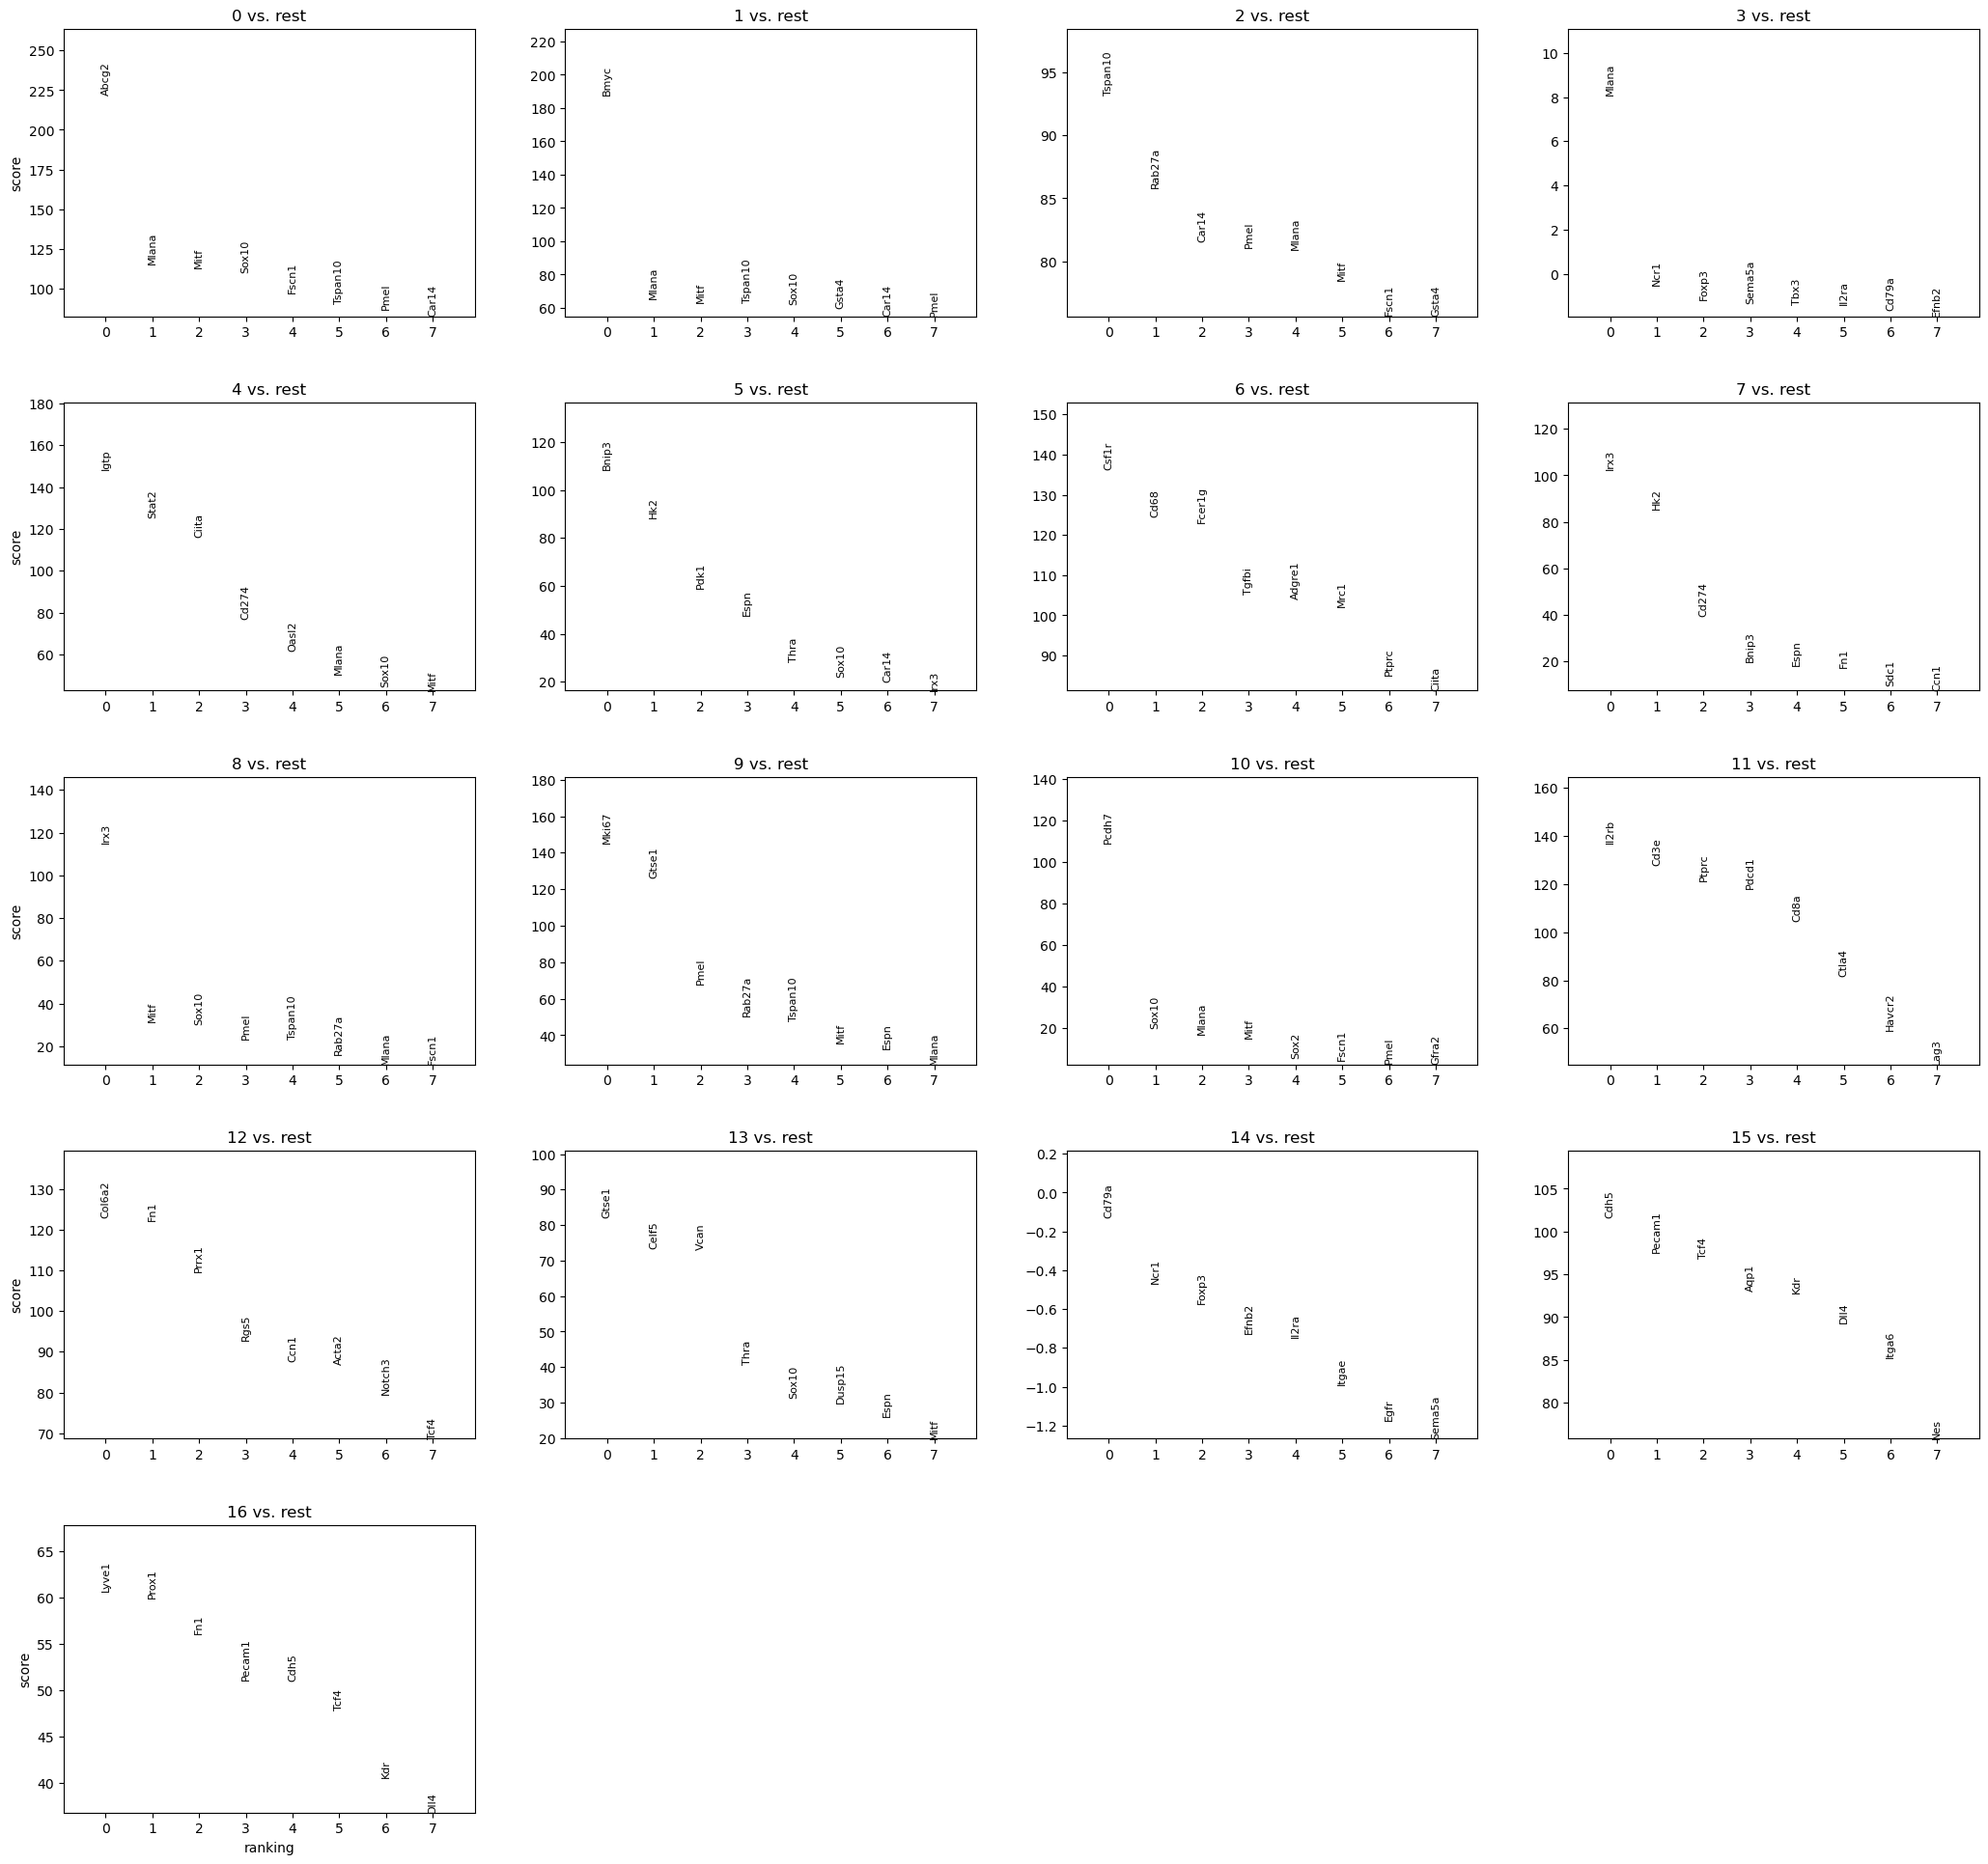

In [7]:
adata = fc.clustering(adata, 16, 30)
fc.clustering_plot(adata)

(-10.959674739837647, 13.873554134368897, -8.78385603427887, 16.66239559650421)

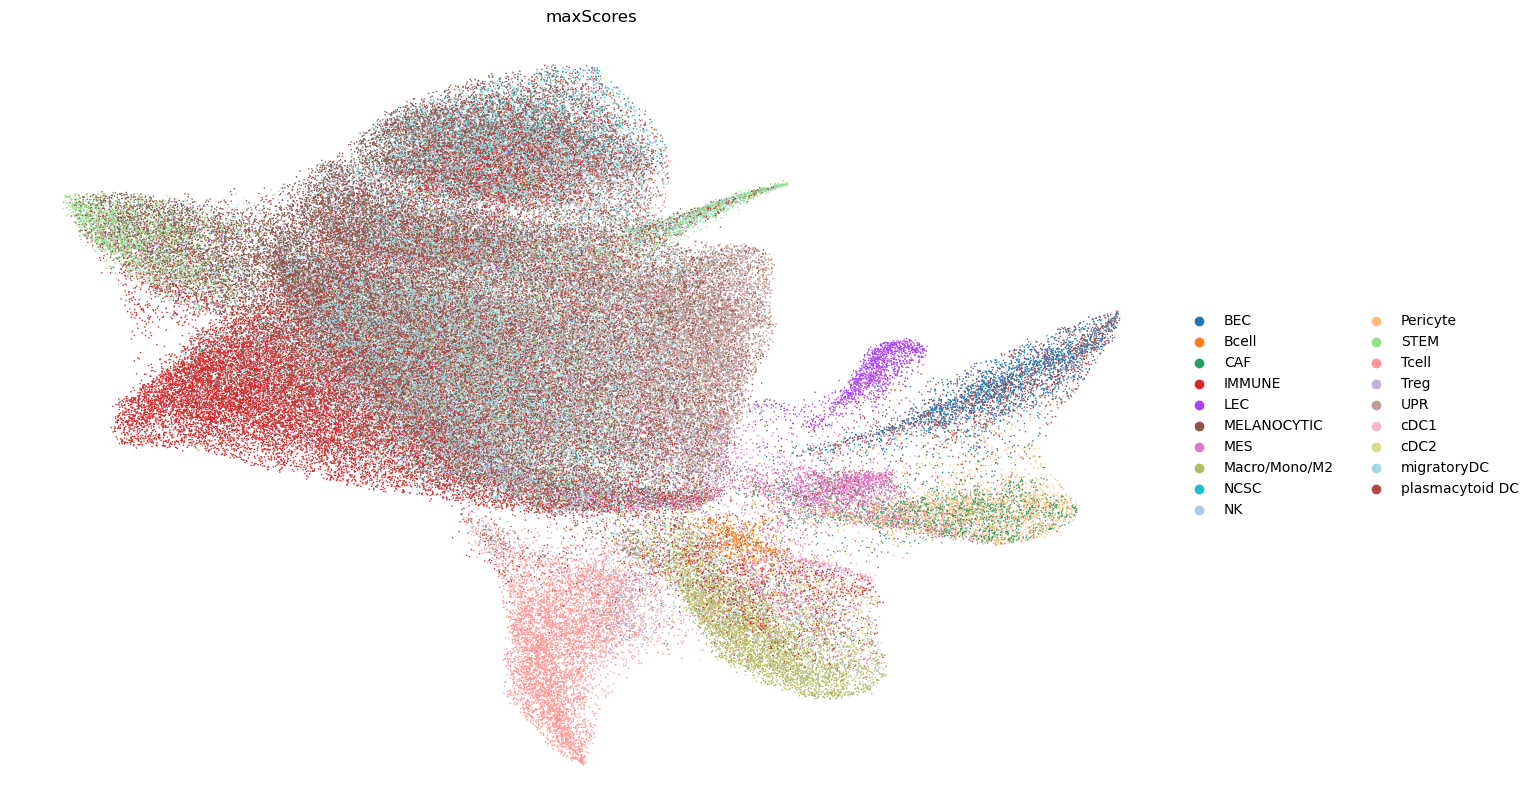

In [8]:
fig,ax =plt.subplots(1,1,figsize=(15,10))
sc.pl.umap(adata,color=['maxScores'],ax=ax,size=5,show=False)
ax.axis('off')

(-10.959674739837647, 13.873554134368897, -8.78385603427887, 16.66239559650421)

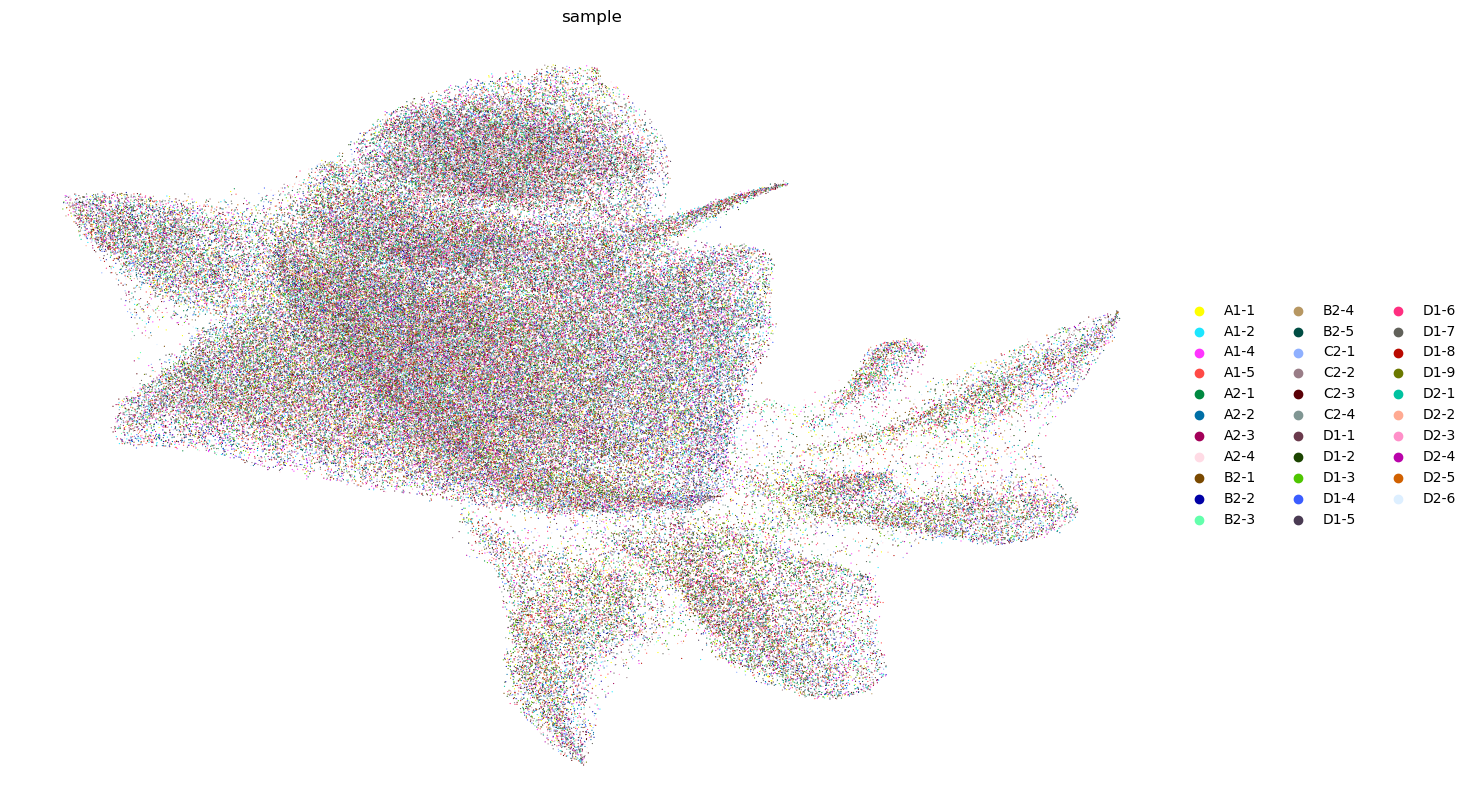

In [9]:
fig,ax =plt.subplots(1,1,figsize=(15,10))
sc.pl.umap(adata, color=["sample"],ax=ax,size=3,show=False)
ax.axis('off')

(-10.959674739837647, 13.873554134368897, -8.78385603427887, 16.66239559650421)

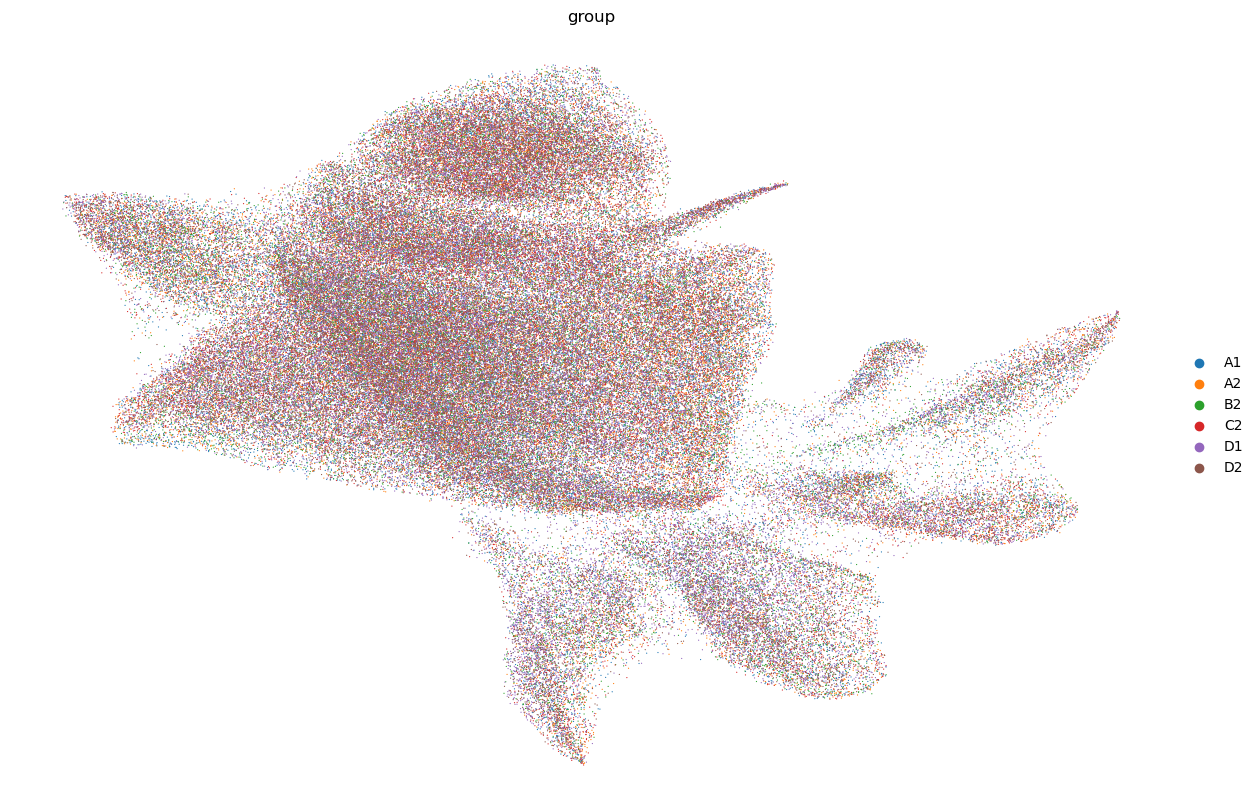

In [10]:
fig,ax =plt.subplots(1,1,figsize=(15,10))
sc.pl.umap(adata, color=["group"],ax=ax,size=3,show=False)
ax.axis('off')

In [11]:
def get_markers(path_folder: str, folders: List[str]) -> str:
    run_folder = path_folder + "/" + folders[0] + "/"

    # Fetch markers file from config if exists
    if os.path.exists(run_folder + ".hydra/config.yaml"):
        with open(run_folder + ".hydra/config.yaml") as infile:
            data = yaml.load(infile, Loader=SafeLoader)
            return data["paths"]["data_dir"] + data["dataset"]["data_dir"].split("/")[1] + "/" + data["dataset"]["markers"].split("/")[1]
    else:
        print("Config file does not exist")

Marker file found /srv/scratch/data/spatial/resolve_melanoma/for_Ranks_matrix.csv


/srv/scratch/koends/anaconda3/envs/napari-spongepy/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/srv/scratch/koends/anaconda3/envs/napari-spongepy/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/srv/scratch/koends/anaconda3/envs/napari-spongepy/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/srv/scratch/koends/anaconda3/envs/napari-spongepy/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and 

/srv/scratch/koends/anaconda3/envs/napari-spongepy/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/srv/scratch/koends/anaconda3/envs/napari-spongepy/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


/srv/scratch/koends/anaconda3/envs/napari-spongepy/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/srv/scratch/koends/anaconda3/envs/napari-spongepy/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/srv/scratch/koends/anaconda3/envs/napari-spongepy/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/srv/scratch/koends/anaconda3/envs/napari-spongepy/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and 

/srv/scratch/koends/anaconda3/envs/napari-spongepy/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/srv/scratch/koends/anaconda3/envs/napari-spongepy/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/srv/scratch/koends/anaconda3/envs/napari-spongepy/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


/srv/scratch/koends/anaconda3/envs/napari-spongepy/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/srv/scratch/koends/anaconda3/envs/napari-spongepy/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/srv/scratch/koends/anaconda3/envs/napari-spongepy/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/srv/scratch/koends/anaconda3/envs/napari-spongepy/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and 

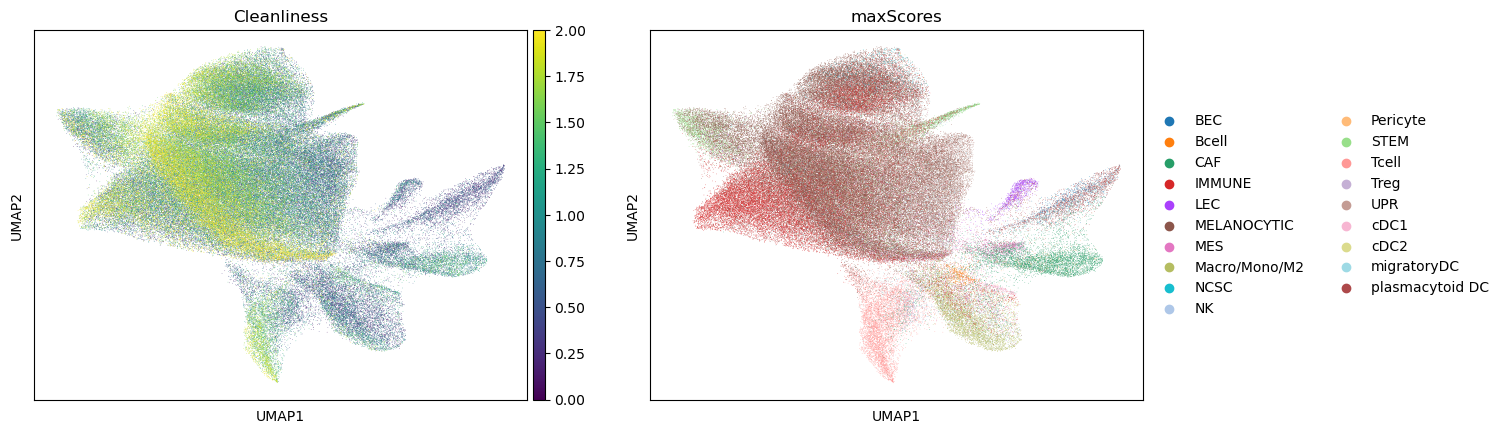

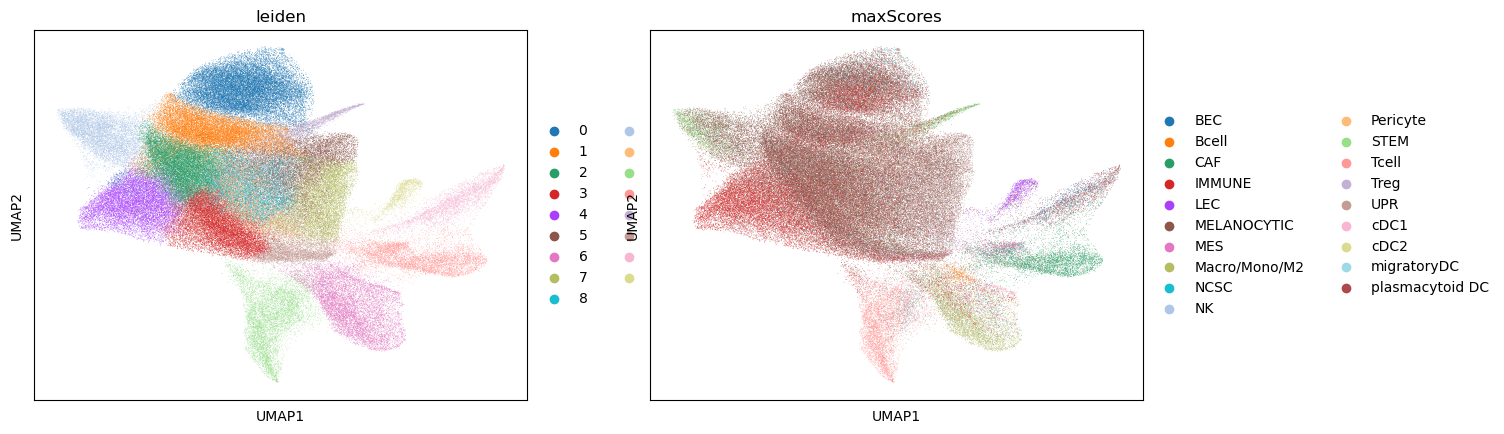

In [12]:
marker_file = get_markers(path_folder, folders)
print("Marker file found " + marker_file)

# Supress _core_genes futerewarnings
warnings.filterwarnings('ignore', '.*FutureWarning.*')

mg_dict, scoresper_cluster = fc.scoreGenes(adata, marker_file)
sc.pl.umap(adata, color=["Cleanliness", "maxScores"])
sc.pl.umap(adata, color=["leiden", "maxScores"])

In [13]:
color_dict = fc.clustercleanliness(adata , list(mg_dict.keys()))

(-10.959674739837647, 13.873554134368897, -8.78385603427887, 16.66239559650421)

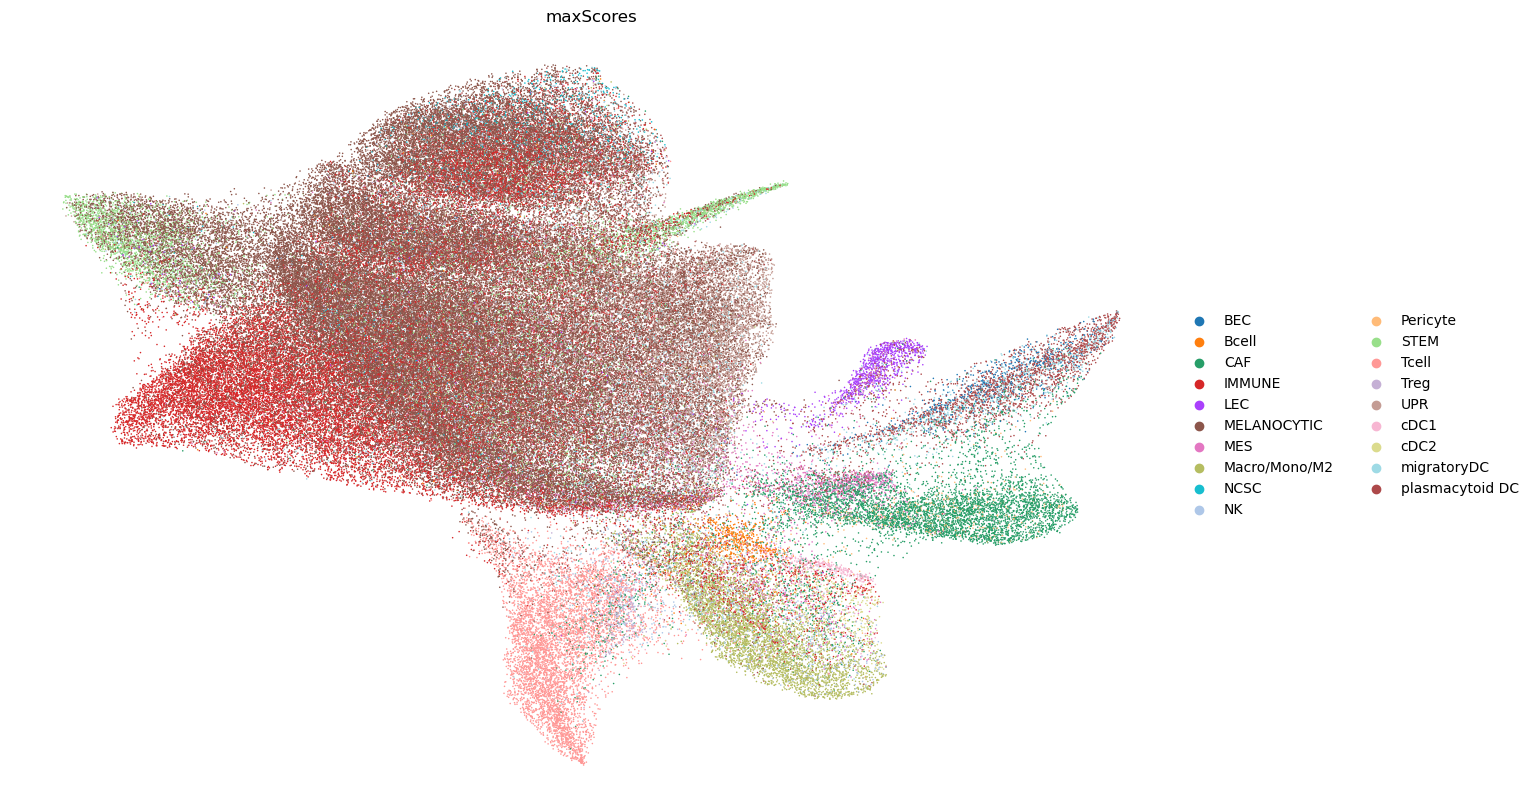

In [14]:
fig,ax =plt.subplots(1,1,figsize=(15,10))
sc.pl.umap(adata ,color=['maxScores'],ax=ax,size=5,show=False)
ax.axis('off')

In [15]:
adata.obs.blatch = adata.obs.blatch.astype('str').astype('category')
adata.write(path_folder + "/adata.h5ad")

AttributeError: 'DataFrame' object has no attribute 'blatch'